# Project Notebook v1

In [72]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

In [73]:
dtt2 = pd.read_csv("Data\DTT Final Data w labels.csv",index_col=0)
dtt2.head()

,Gender,Age,Age_Breaks,Region2,Race,Language_Dominance,Parent,HH_Income,Employment,Education,...,Rented_Digital_iVOD,Rented_Digital_sVOD,Rented_Digital_cVOD,cqhidGroup,filter_$,ZTotal_Paid_HE_Movies,Buy_Disc_Percent,Buy_Digital_Percent,Rent_Disc_Percent,Rent_Digital_Percent
respid,,,,,,,,,,,,,,,,,,,,,
44,Female,20,18-24,South,Black,,,1 - < $20K,4 - Not employed,2 - HS Grad,...,5,18,4,Gen-Pop,Selected,1.492690,0.363636,0.0,0.145455,0.490909
108,Male,31,25-34,Northeast,Hispanic,Only English,No,1 - < $20K,4 - Not employed,2 - HS Grad,...,0,0,0,Gen-Pop,Selected,0.009386,0.157895,0.0,0.842105,0.000000
147,Female,19,18-24,South,White,,,1 - < $20K,4 - Not employed,2 - HS Grad,...,0,5,0,Gen-Pop,Selected,-0.567454,0.000000,0.0,0.000000,1.000000
171,Female,18,18-24,Northeast,White,,,1 - < $20K,2 - Part time,3 - Some coll,...,0,7,0,Gen-Pop,Selected,-0.485048,0.000000,0.0,0.000000,1.000000
174,Female,54,45-54,South,White,,No,1 - < $20K,4 - Not employed,2 - HS Grad,...,0,50,0,Gen-Pop,Selected,1.286676,0.000000,0.0,0.000000,1.000000


In [74]:
#Calculates all rollups and adds as columns

#total movies bought on disc
dtt2['Total Discs Bought'] = (dtt2['Bought_Disc_BD'] + dtt2['Bought_Disc_DVD'])

#total movies rented on disc
dtt2['Total Discs Rented'] = (dtt2['Rented_Disc_Kiosk'] + dtt2['Rented_Disc_Mail'] + dtt2['Rented_Disc_Store'])

#total movies rented on digital
dtt2['Total Digital Rented'] = (dtt2['Rented_Digital_cVOD'] + dtt2['Rented_Digital_iVOD'] + dtt2['Rented_Digital_sVOD'])


In [60]:
print dtt2.columns

Index([u'Gender', u'Age', u'Age_Breaks', u'Region2', u'Race',
       u'Language_Dominance', u'Parent', u'HH_Income', u'Employment',
       u'Education', u'Marital_Status', u'Total_Paid_HE_Movies',
       u'Bought_Disc_DVD', u'Bought_Disc_BD', u'Bought_Digital',
       u'Rented_Disc_Store', u'Rented_Disc_Kiosk', u'Rented_Disc_Mail',
       u'Rented_Digital_iVOD', u'Rented_Digital_sVOD', u'Rented_Digital_cVOD',
       u'cqhidGroup', u'filter_$', u'ZTotal_Paid_HE_Movies',
       u'Buy_Disc_Percent', u'Buy_Digital_Percent', u'Rent_Disc_Percent',
       u'Rent_Digital_Percent', u'Total Discs Bought', u'Total Discs Rented',
       u'Total Digital Rented'],
      dtype='object')


# Key Measures by Demographics

In [77]:
Demographics = ['Gender','Age_Breaks','Region2','Race','Parent',
                'HH_Income','Employment', 'Education', 'Marital_Status']
Consumption_Measures = ['Total_Paid_HE_Movies','Total Discs Bought',
                        'Bought_Digital','Total Discs Rented','Total Digital Rented']

dtt2.groupby(dtt2.Gender)[Consumption_Measures].mean()

,Total_Paid_HE_Movies,Total Discs Bought,Bought_Digital,Total Discs Rented,Total Digital Rented
Gender,,,,,
Female,15.535457,2.483042,0.668037,3.685509,8.698869
Male,16.768908,3.269958,0.780462,4.014706,8.703782


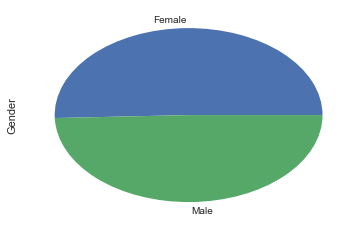

In [61]:
dtt2.Gender.value_counts().sort_index().plot(kind='pie')

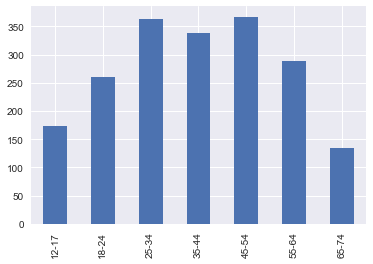

In [62]:
dtt2.Age_Breaks.value_counts().sort_index().plot(kind='bar')


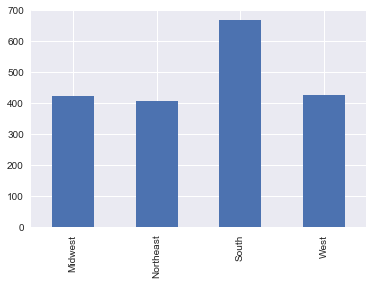

In [63]:
dtt2.Region2.value_counts().sort_index().plot(kind='bar')


 u'Race',
       u'Language_Dominance', u'Parent', u'HH_Income', u'Employment',
       u'Education', u'Marital_Status'

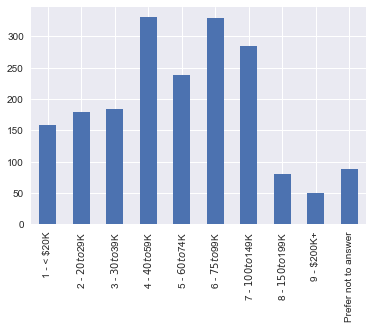

In [64]:
dtt2.HH_Income.value_counts().sort_index().plot(kind='bar')

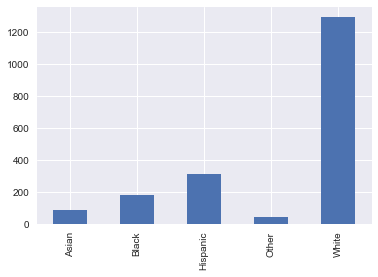

In [65]:
dtt2.Race.value_counts().sort_index().plot(kind='bar')

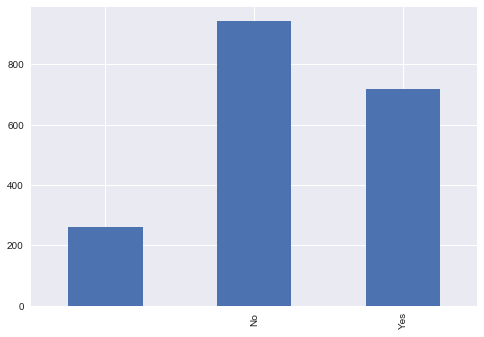

In [55]:
dtt2.Parent.value_counts().sort_index().plot(kind='bar')

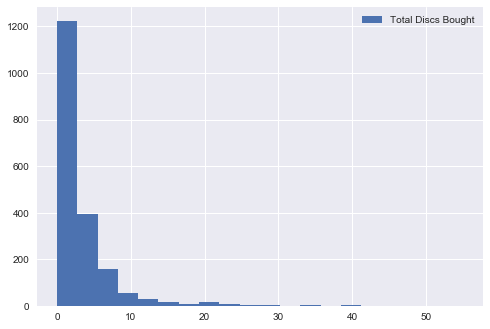

In [29]:
plt.hist(dtt2['Total Discs Bought'],bins=20,histtype='bar')
plt.legend(['Total Discs Bought'])

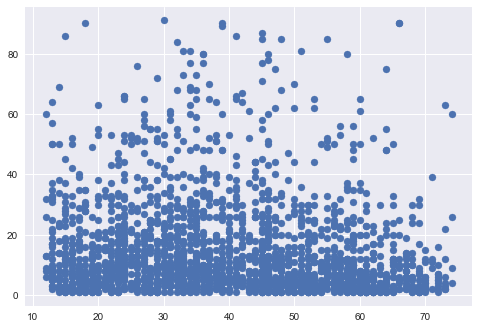

In [32]:
plt.scatter(dtt2.Age,dtt2['Total_Paid_HE_Movies'])

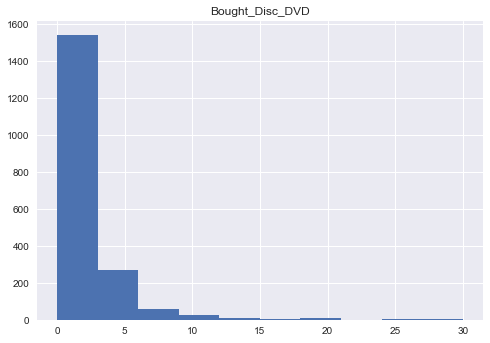

In [7]:
plt.hist(dtt2['Bought_Disc_DVD'])
plt.title("Bought_Disc_DVD")

In [13]:
dtt2.describe()

,Gender,Age,Region,Race,HH_Income,Employment,Education,Marital_Status,Total_Paid_HE_Movies,Bought_Disc_DVD,...,Rented_Digital_sVOD,Rented_Digital_cVOD,cqhidGroup,filter_$,ZTotal_Paid_HE_Movies,Buy_Disc_Percent,Buy_Digital_Percent,Rent_Disc_Percent,Rent_Digital_Percent,Total Discs Bought
count,1925.000000,1925.000000,1925.00000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.0,1925.0,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,1.505455,39.631169,2.57974,1.916364,4.952208,2.100260,3.535584,2.144935,16.145455,1.588052,...,6.691429,1.291948,1.0,1.0,-0.108229,0.239981,0.041825,0.234541,0.483653,2.872208
std,0.500100,15.969080,1.05341,1.512514,2.325802,1.265168,1.391019,0.970073,16.526946,2.914257,...,10.804796,3.550492,0.0,0.0,0.680958,0.306352,0.111739,0.292798,0.369288,4.604784
min,1.000000,12.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.0,1.0,-0.732266,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,26.000000,2.00000,1.000000,3.000000,1.000000,3.000000,1.000000,5.000000,0.000000,...,0.000000,0.000000,1.0,1.0,-0.567454,0.000000,0.000000,0.000000,0.133333,0.000000
50%,2.000000,39.000000,3.00000,1.000000,5.000000,1.000000,3.000000,3.000000,10.000000,1.000000,...,3.000000,0.000000,1.0,1.0,-0.361440,0.136364,0.000000,0.116279,0.483871,1.000000
75%,2.000000,52.000000,3.00000,2.000000,7.000000,3.000000,4.000000,3.000000,22.000000,2.000000,...,10.000000,1.000000,1.0,1.0,0.132995,0.333333,0.014925,0.375000,0.833333,4.000000
max,2.000000,74.000000,4.00000,5.000000,10.000000,4.000000,7.000000,4.000000,91.000000,30.000000,...,80.000000,75.000000,1.0,1.0,2.975994,1.000000,1.000000,1.000000,1.000000,55.000000


(array([ 979.,  244.,  152.,  138.,  105.,   88.,   42.,   29.,   20.,
          36.,   25.,    6.,    5.,    8.,    5.,    3.,    5.,    1.,
          15.,    0.,    4.,    3.,    1.,    0.,    1.,    1.,    0.,
           3.,    0.,    0.,    1.,    1.,    0.,    0.,    0.,    0.,
           2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    1.]),
 array([  0. ,   1.1,   2.2,   3.3,   4.4,   5.5,   6.6,   7.7,   8.8,
          9.9,  11. ,  12.1,  13.2,  14.3,  15.4,  16.5,  17.6,  18.7,
         19.8,  20.9,  22. ,  23.1,  24.2,  25.3,  26.4,  27.5,  28.6,
         29.7,  30.8,  31.9,  33. ,  34.1,  35.2,  36.3,  37.4,  38.5,
         39.6,  40.7,  41.8,  42.9,  44. ,  45.1,  46.2,  47.3,  48.4,
         49.5,  50.6,  51.7,  52.8,  53.9,  55. ]),
 <a list of 50 Patch objects>)

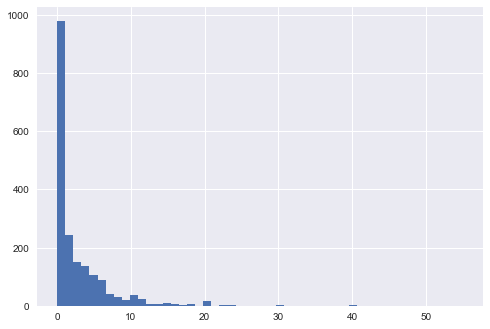

In [12]:
plt.hist(dtt2['Total Discs Bought'], bins=50)

In [33]:
dtt2.columns

Index([u'Gender', u'Age', u'Region', u'Race', u'Language_Dominance', u'Parent',
       u'HH_Income', u'Employment', u'Education', u'Marital_Status',
       u'Total_Paid_HE_Movies', u'Bought_Disc_DVD', u'Bought_Disc_BD',
       u'Bought_Digital', u'Rented_Disc_Store', u'Rented_Disc_Kiosk',
       u'Rented_Disc_Mail', u'Rented_Digital_iVOD', u'Rented_Digital_sVOD',
       u'Rented_Digital_cVOD', u'cqhidGroup', u'filter_$',
       u'ZTotal_Paid_HE_Movies', u'Buy_Disc_Percent', u'Buy_Digital_Percent',
       u'Rent_Disc_Percent', u'Rent_Digital_Percent', u'Total Discs Bought',
       u'Total Discs Rented', u'Total Digital Rented'],
      dtype='object')

In [70]:
Demographics = ['Gender','Age_Breaks', ]
Consumption = ['Total_Paid_HE_Movies','Total Discs Bought','Bought_Digital','Total Discs Rented','Total Digital Rented']

In [71]:
dtt2.groupby('Gender')[Consumption].mean()

,Total_Paid_HE_Movies,Total Discs Bought,Bought_Digital,Total Discs Rented,Total Digital Rented
Gender,,,,,
Female,15.535457,2.483042,0.668037,3.685509,8.698869
Male,16.768908,3.269958,0.780462,4.014706,8.703782


### Original work

In [2]:
#C:\Users\anne1\Documents\DS_SM_15\projects\AAR_final-project

#C:\Users\anne1\Documents\DS_SM_15\projects\AAR_final-project\Data

dtt = pd.read_csv("Data\DTT Combined.csv",index_col=0)
dtt.head()

,b1_1_TV_Buy_Disc_DVD_FS_All,b1_2_TV_Buy_Disc_Blu.ray_FS_All,b1_3_TV_Buy_Digtl_FS_All,b1_4_TV_Buy_Digtl_Ep_All,b1_5_TV_Rent_Disc_Store_FS_All,b1_6_TV_Rent_Disc_Mail_FS_All,b1_7_TV_Rent_Digtl_Sub_FS_All,b1_8_TV_Rent_Digtl_Sub_Ep_All,b1_9_TV_Free_Digtl_Ads_FS_All,b1_10_TV_Free_Digtl_Ads_Ep_All,...,Typ.Dev.Watch.Digital_Game_Xbox.One,Typ.Dev.Watch.Digital_Game_PS3,Typ.Dev.Watch.Digital_Game_PS4,Typ.Dev.Watch.Digital_Game_Nintendo.Wii,Typ.Dev.Watch.Digital_Game_Nintendo.Wii.U,Typ.Dev.Watch.Digital_Game_Other.Console,Typ.Dev.Watch.Digital_Game_Handheld,Typ.Dev.Watch.Digital_Stream_Roku.Stick,Typ.Dev.Watch.Digital_Stream_Amazon.Fire.TV,Typ.Dev.Watch.Digital_None
respid,,,,,,,,,,,,,,,,,,,,,
2,2,3,2,1,1,1,2,2,3,3,...,,,1,,,,,,,0
7,0,0,0,0,0,0,1,10,0,0,...,,,,,0,,,,,0
9,1,1,1,1,1,1,5,1,1,1,...,,,0,,,,,,1,0
10,0,0,0,0,0,0,0,0,0,0,...,,,,,,,,,,0
11,0,0,1,0,0,0,0,0,0,0,...,,,,,,,,,,1


### Calculate and add columns for movie home entertainment consumption roll ups and percents

In [3]:
# calculates total movies paid home entertainment
dtt['b3_Mo_HE_Paid_Total'] = (
    dtt['b3_2_Mo_Buy_Disc_DVD_All'] + 
    dtt['b3_3_Mo_Buy_Disc_Blu.ray_All'] + 
    dtt['b3_4_Mo_Buy_Digtl_All'] + 
    dtt['b3_5_Mo_Rent_Disc_Store_All'] + 
    dtt['b3_6_Mo_Rent_Disc_Kiosk_All'] + 
    dtt['b3_7_Mo_Rent_Disc_Mail_All'] + 
    dtt['b3_8_Mo_Rent_Digtl_Trans_All'] + 
    dtt['b3_9_Mo_Rent_Digtl_Sub_All'])


In [4]:
# filters out all cases where total paid HE is zero

dtt = dtt[dtt["b3_Mo_HE_Paid_Total"] != 0]

In [28]:
# filters out outlier cases based on std

mean = dtt[['b3_Mo_HE_Paid_Total']].mean()
std = dtt[['b3_Mo_HE_Paid_Total']].std()

print mean
print std

b3_Mo_HE_Paid_Total    19.44597
dtype: float64
b3_Mo_HE_Paid_Total    27.149808
dtype: float64
b3_Mo_HE_Paid_Total    73.745585
dtype: float64


In [30]:
dtt['threshold'] = (dtt['b3_Mo_HE_Paid_Total'] - mean) / std



<bound method Series.describe of respid
2       NaN
7       NaN
9       NaN
11      NaN
17      NaN
20      NaN
23      NaN
25      NaN
26      NaN
27      NaN
30      NaN
31      NaN
34      NaN
36      NaN
38      NaN
40      NaN
44      NaN
45      NaN
46      NaN
49      NaN
55      NaN
59      NaN
66      NaN
68      NaN
71      NaN
73      NaN
82      NaN
86      NaN
90      NaN
93      NaN
         ..
22713   NaN
22727   NaN
22739   NaN
22746   NaN
22749   NaN
22753   NaN
22773   NaN
22783   NaN
22784   NaN
22794   NaN
22807   NaN
22811   NaN
22814   NaN
22819   NaN
22827   NaN
22857   NaN
22887   NaN
22888   NaN
22892   NaN
22915   NaN
22921   NaN
22924   NaN
22947   NaN
22955   NaN
22958   NaN
22964   NaN
22971   NaN
22973   NaN
22975   NaN
22994   NaN
Name: threshold, Length: 2258, dtype: float64>

In [5]:
# calculates total disc purchases
dtt['b3_Mo_Buy_Disc_Total'] = (
    dtt['b3_2_Mo_Buy_Disc_DVD_All'] + 
    dtt['b3_3_Mo_Buy_Disc_Blu.ray_All'])

dtt['perc_b3_Mo_Buy_Disc_Total'] = dtt['b3_Mo_Buy_Disc_Total'] / dtt['b3_Mo_HE_Paid_Total']

In [6]:
# calculates total digital purchases (actually just creates new column with that name)
dtt['b3_Mo_Buy_Digtl_Total'] = dtt['b3_4_Mo_Buy_Digtl_All']

dtt['perc_b3_Mo_Buy_Digtl_Total'] = dtt['b3_Mo_Buy_Digtl_Total'] / dtt['b3_Mo_HE_Paid_Total']

In [7]:
# calculates total disc rental
dtt['b3_Mo_Rent_Disc_Total'] = (
    dtt['b3_5_Mo_Rent_Disc_Store_All'] + 
    dtt['b3_6_Mo_Rent_Disc_Kiosk_All'] + 
    dtt['b3_7_Mo_Rent_Disc_Mail_All'])

dtt['perc_b3_Mo_Rent_Disc_Total'] = dtt['b3_Mo_Rent_Disc_Total'] / dtt['b3_Mo_HE_Paid_Total']

In [8]:
# calculates total digital rental
dtt['b3_Mo_Rent_Digtl_Total'] = (
    dtt['b3_8_Mo_Rent_Digtl_Trans_All'] + 
    dtt['b3_9_Mo_Rent_Digtl_Sub_All'])

dtt['perc_b3_Mo_Rent_Digtl_Total'] = dtt['b3_Mo_Rent_Digtl_Total'] / dtt['b3_Mo_HE_Paid_Total']

In [9]:
# calculates total purchases
dtt['b3_Mo_Buy_Total'] = (
    dtt['b3_2_Mo_Buy_Disc_DVD_All'] + 
    dtt['b3_3_Mo_Buy_Disc_Blu.ray_All'] + 
    dtt['b3_4_Mo_Buy_Digtl_All'])

dtt['perc_b3_Mo_Buy_Total'] = dtt['b3_Mo_Buy_Total'] / dtt['b3_Mo_HE_Paid_Total']

In [10]:
# calculates total rentals
dtt['b3_Mo_Rent_Total'] = (
    dtt['b3_5_Mo_Rent_Disc_Store_All'] + 
    dtt['b3_6_Mo_Rent_Disc_Kiosk_All'] + 
    dtt['b3_7_Mo_Rent_Disc_Mail_All'] + 
    dtt['b3_8_Mo_Rent_Digtl_Trans_All'] + 
    dtt['b3_9_Mo_Rent_Digtl_Sub_All'])

dtt['perc_b3_Mo_Rent_Total'] = dtt['b3_Mo_Rent_Total'] / dtt['b3_Mo_HE_Paid_Total']

In [11]:
# calculates total disc transactions
dtt['b3_Mo_Disc_Total'] = (
    dtt['b3_2_Mo_Buy_Disc_DVD_All'] + 
    dtt['b3_3_Mo_Buy_Disc_Blu.ray_All'] + 
    dtt['b3_5_Mo_Rent_Disc_Store_All'] + 
    dtt['b3_6_Mo_Rent_Disc_Kiosk_All'] + 
    dtt['b3_7_Mo_Rent_Disc_Mail_All'])

dtt['perc_b3_Mo_Disc_Total'] = dtt['b3_Mo_Disc_Total'] / dtt['b3_Mo_HE_Paid_Total']

In [12]:
# calculates total digital transactions
dtt['b3_Mo_Digtl_Total'] = (
    dtt['b3_4_Mo_Buy_Digtl_All'] + 
    dtt['b3_8_Mo_Rent_Digtl_Trans_All'] + 
    dtt['b3_9_Mo_Rent_Digtl_Sub_All'])

dtt['perc_b3_Mo_Digtl_Total'] = dtt['b3_Mo_Digtl_Total'] / dtt['b3_Mo_HE_Paid_Total']

In [21]:
mean = dtt[['b3_Mo_HE_Paid_Total']].mean()
std = dtt[['b3_Mo_HE_Paid_Total']].std()

print mean
print std

b3_Mo_HE_Paid_Total    19.44597
dtype: float64
b3_Mo_HE_Paid_Total    27.149808
dtype: float64
